# Part I - (Car Price Prediction DataSet)
## by (Toluwalase Abikehin)

## Introduction
The dataset presents the pricing of cars with some car features including 'Levy', 'Manufacturer', 'Model', 'Prod. year','Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage','Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color','Airbags'


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
car = pd.read_csv('car_price_prediction.csv')

In [3]:
# high-level overview of data shape and composition
print(car.shape)
print(car.dtypes)
print(car.head(10))

(19234, 18)
ID                   int64
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object
         ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS    RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET   Equinox        2011       Jeep   
2  45774419   8467     -        HONDA       FIT        2006  Hatchback   
3  45769185   3607   862         FORD    Escape        2011       Jeep   
4  45809263  11726   446        HONDA       FIT        2014  Hatchback   
5  45802912  39493   891      HYUNDAI  Santa

In [4]:
#change datatype
car['Mileage'] = [sub.replace('km', "").strip() for sub in car['Mileage']]
car['Mileage'] = car['Mileage'].astype(int)

In [5]:
# convert fuel type, gear box type, and color into ordered categorical types
df = car
ordinal_var_dict = {'Fuel type': ['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'],
                    'Gear box type': ['Automatic', 'Tiptronic', 'Variator', 'Manual'],
                    'Color': ['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'] }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19234 entries, 0 to 19233
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19234 non-null  int64   
 1   Price             19234 non-null  int64   
 2   Levy              19234 non-null  object  
 3   Manufacturer      19234 non-null  object  
 4   Model             19234 non-null  object  
 5   Prod. year        19234 non-null  int64   
 6   Category          19234 non-null  object  
 7   Leather interior  19234 non-null  object  
 8   Fuel type         19234 non-null  category
 9   Engine volume     19234 non-null  object  
 10  Mileage           19234 non-null  int32   
 11  Cylinders         19234 non-null  int64   
 12  Gear box type     19234 non-null  category
 13  Drive wheels      19234 non-null  object  
 14  Doors             19234 non-null  object  
 15  Wheel             19234 non-null  object  
 16  Color             1923

In [7]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

### What is the structure of your dataset?

> There are 19237 cars in the dataset with 17 features ('ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'). The datatypes include integers, strings, and categorical.

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest in this database is price estimates of the car as factored by the features included in the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To support my investigation into the car pricing, the mileage, gear box type, color and fuel type features would be used. 


## Univariate Exploration

In [8]:
np.log10(df['Mileage'].describe())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    4.284070
mean     6.185392
std      7.684914
min          -inf
25%      4.846069
50%      5.100402
75%      5.276397
max      9.331930
Name: Mileage, dtype: float64

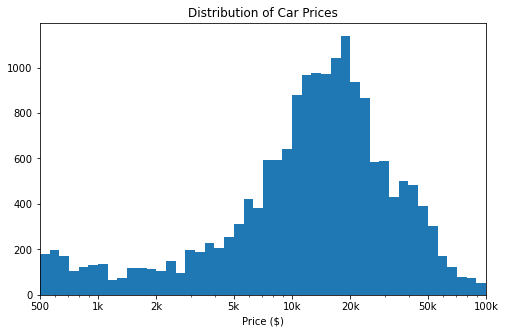

In [9]:
#plot histogram on log scale for price
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['Price'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Price', bins = bins)
plt.title('Distribution of Car Prices')
plt.xscale('log')
plt.xlim([500, 1e5])
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5 ], [500, '1k', '2k', '5k', '10k', '20k','50k','100k'])
plt.xlabel('Price ($)')
plt.show()

The price distribution shows some tail distribution to the left showing more levels on low price region. 

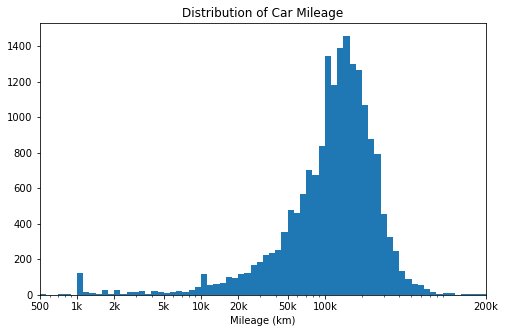

In [10]:
# Plot histogram for mileage
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['Mileage'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Mileage', bins = bins)
plt.title('Distribution of Car Mileage')
plt.xscale('log')
plt.xlim([500, 2e6])
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e6 ], [500, '1k', '2k', '5k', '10k', '20k','50k','100k','200k'])
plt.xlabel('Mileage (km)')
plt.show()


The mileage distribution shows some minimal tail distribution to the left.

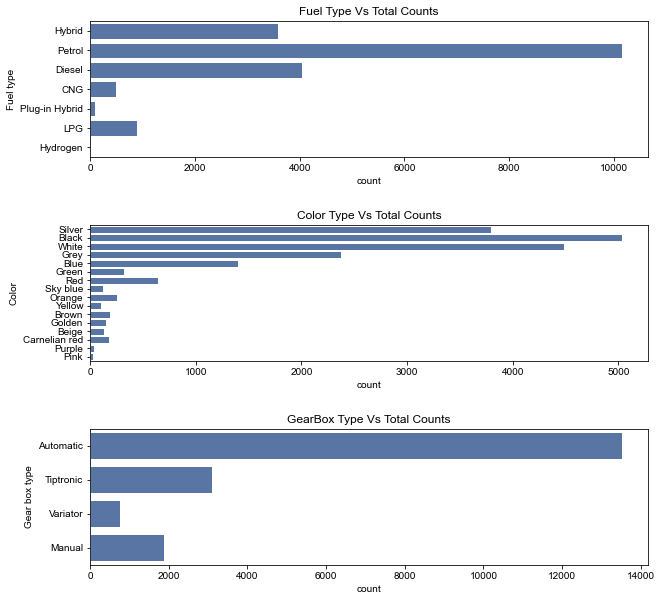

In [11]:
# plot 'Fuel type', 'Gear box type', and 'Color' on histogram to see distribution

fig, ax = plt.subplots(nrows=3, figsize = [10,10])
sb.set()
default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'Fuel type', color = default_color, ax = ax[0]).set(title = 'Fuel Type Vs Total Counts')
sb.countplot(data = df, y = 'Color', color = default_color, ax = ax[1]).set(title = 'Color Type Vs Total Counts')
sb.countplot(data = df, y = 'Gear box type', color = default_color, ax = ax[2]).set(title = 'GearBox Type Vs Total Counts')
plt.subplots_adjust(hspace = 0.5)
plt.show()



Many of the car types are petrol and diesel fuel types, however LPG seems to be on a promising level. It is shown that there seem to be a lot of preference for black colored cars followed by white. Automatic bear box type seem to be the top sold car followed by tiptronic before manual. This suggests some transition from manual to automatic in recent years. 

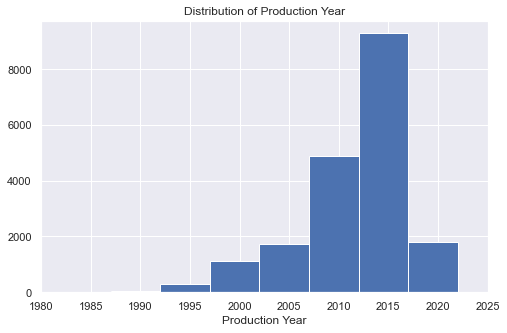

In [23]:
#plot hist distibution for year of production
bins = np.arange(1937, 2025, 5)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Prod. year', bins = bins)
plt.xlabel('Production Year')
plt.xlim([1980,2025])
plt.title("Distribution of Production Year")
plt.show();

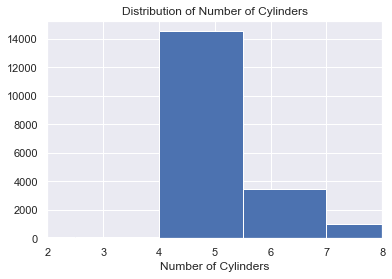

In [24]:
#plot hist distibution for Number of Cylinders
plt.hist(data = df, x = 'Cylinders')
plt.xlabel('Number of Cylinders')
plt.xlim([2,8])
plt.title("Distribution of Number of Cylinders")
plt.show();

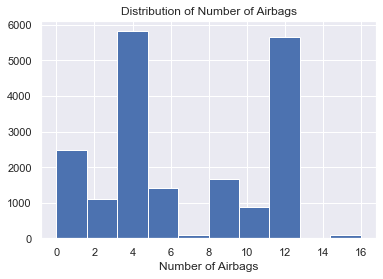

In [26]:
#plot hist distibution for Number of Airbags
plt.hist(data = df, x = 'Airbags')
plt.xlabel('Number of Airbags')
plt.title("Distribution of Number of Airbags")
plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution on a standard scale didn't give appropriate plot and log transformation was required for the price distribution. The price distribution shows some tail distribution to the left showing more levels on low price region. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Yes the car mileage distribution showed unusual distribution that needed to be transformed using the logarithmic scale to get a little left skewed distribution. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

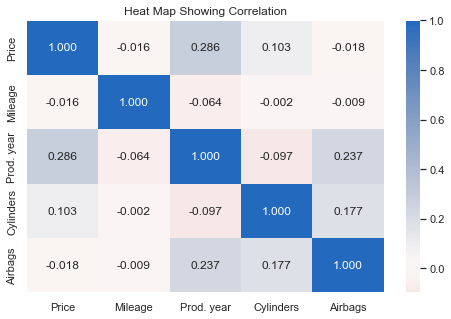

In [27]:
#Correlation Plots
numeric_vars = ['Price', 'Mileage', 'Prod. year','Cylinders','Airbags']
categoric_vars = ['Fuel type', 'Color', 'Gear box type']
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Heat Map Showing Correlation")
plt.show()

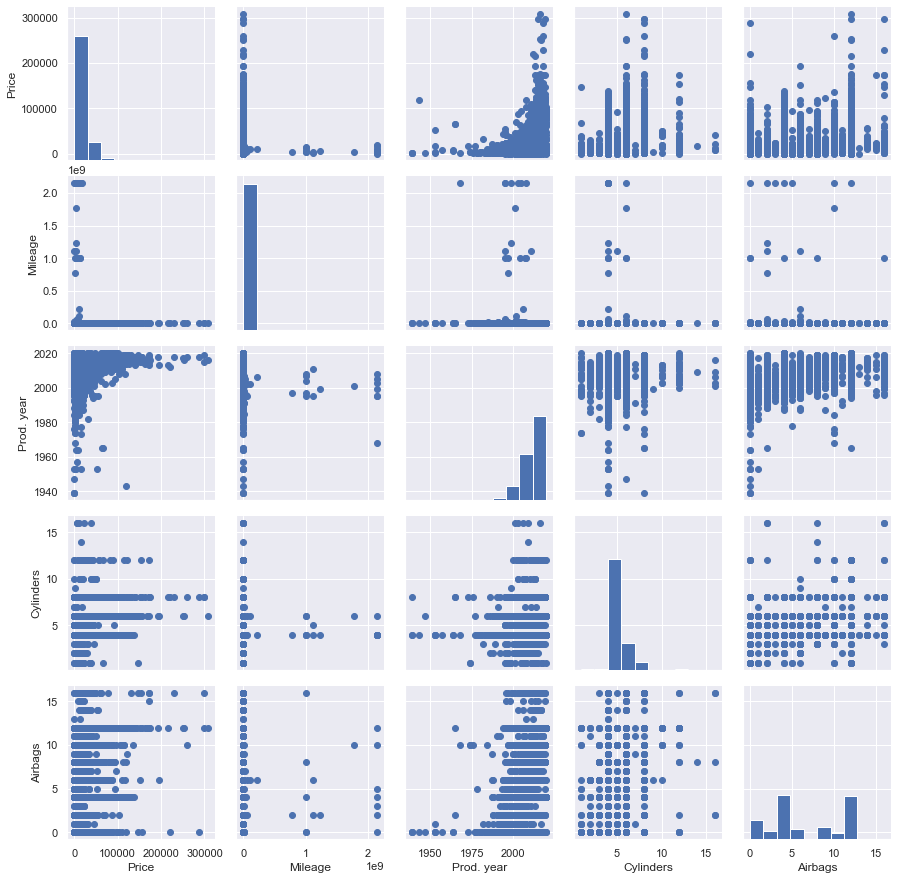

In [33]:
# plot correlation matrix
g = sb.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

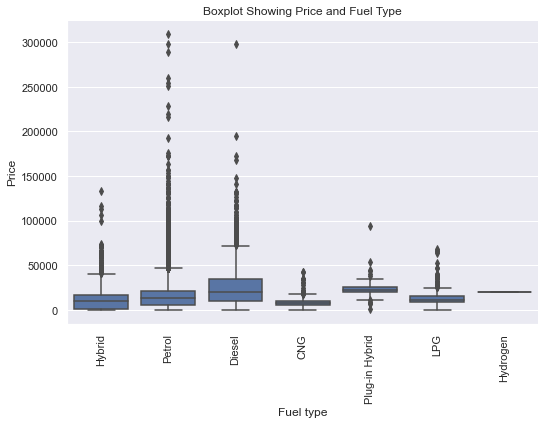

''

In [40]:
# plot matrix of numeric features against categorical features.
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 90)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['Price'], x_vars = 'Fuel type',size = 5, aspect = 1.5).set(title = "Boxplot Showing Price and Fuel Type")
g.map(boxgrid)
plt.xticks(rotation = 90)
plt.show()
;



The box plot confirms the top price levels of Diesel and Petrol fuel type cars. As well the high price levels of natural colors, white and black. However for the gear box type, there is a higher price level for Tiptronic than Automatic.

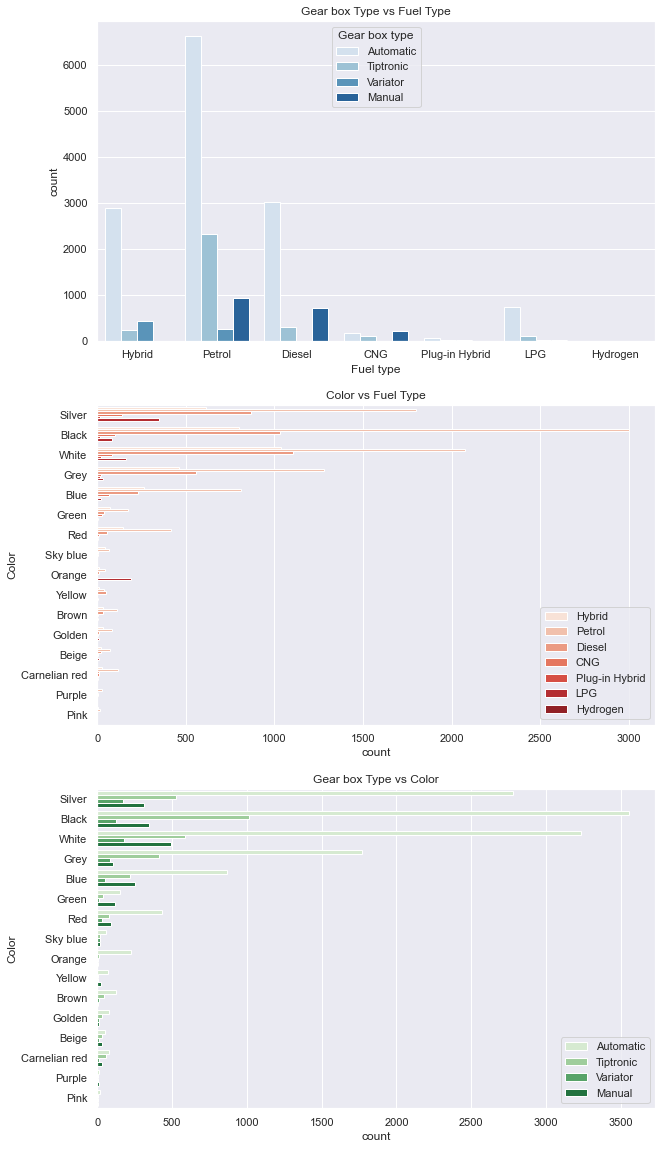

In [42]:
#plots 'Fuel type', 'Gear box type', and 'Color' features
plt.figure(figsize = [10, 20])

# subplot 1: 'Fuel type' vs 'Gear box type'
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'Fuel type', hue = 'Gear box type', palette = 'Blues').set(title = "Gear box Type vs Fuel Type")

# subplot 2: 'Fuel type' vs. Color
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, hue = 'Fuel type', y = 'Color', palette = 'Reds').set(title = "Color vs Fuel Type")
ax.legend(ncol = 2) 
plt.legend(loc='lower right')

# subplot 3: Gear box type vs. Color
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, hue = 'Gear box type', y = 'Color', palette = 'Greens').set(title = "Gear box Type vs Color")
ax.legend(loc = 1, ncol = 2) 
plt.legend(loc='lower right')
plt.show()

While it is seen from the first plot that the petrol fuel type cars have the greatest counts, the automatic and tiptronic gear box types makes the weight. Black and White colored cars are the drivers for the count of sales with the automatic gears.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The price of the car doesn't show a strong direct correlation with the mileage, airbags, but a rather weak coorelation with number of cylinders and the year of production. The natural colors seem to be the price drivers for the cars with tiptronic and automatic gear types and petrol fuel type cars. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Amazingly the plot shows some level of correlation between number of airbags and Year of car Production. This is suggestive of design engineering over time. 

## Multivariate Exploration

> Create plots of three variables


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


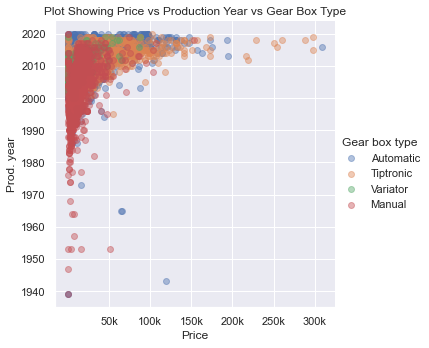

In [54]:
#3 variable plot Plot Showing Price vs Production Year vs Gear Box Type
g = sb.FacetGrid(data = df, hue ='Gear box type',size = 5).set(title = "Plot Showing Price vs Production Year vs Gear Box Type")
g.map(plt.scatter, 'Price','Prod. year', alpha = 3/7)
plt.xticks([50000, 100000, 150000, 200000, 250000, 300000], ['50k', '100k', '150k', '200k','250k','300k'])
g.add_legend()

The plot shown above informs that the Tiptronic gearbox type makes the highest car price. And it is obviously a design gained market force around 2010. The Manual Cars are densely compacted in the 10k - 50k price region.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


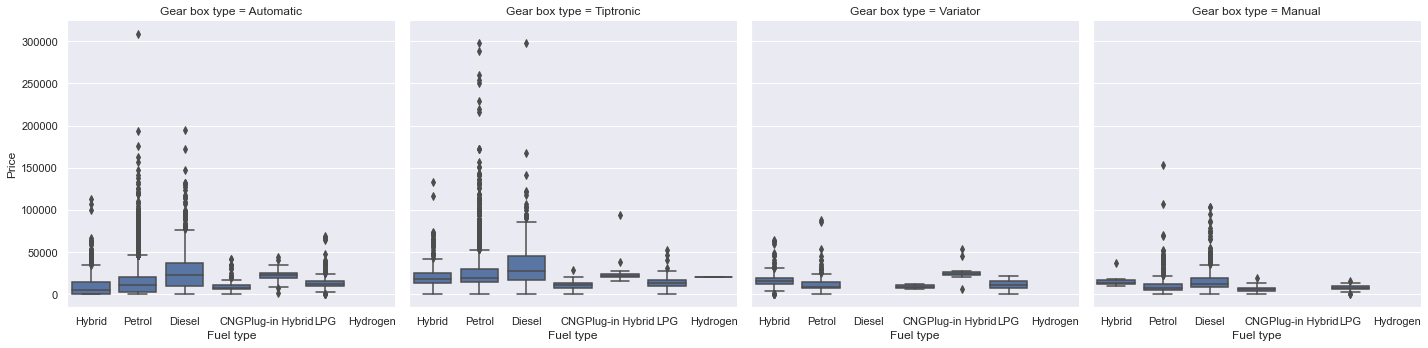

In [56]:
# 3 variable plot Showing Price and Fuel Type and Gear box Type
sb.set()
g = sb.FacetGrid(data = df, col ='Gear box type',height = 5).set(title = "Boxplot Showing Price and Fuel Type and Gear box Type")
g.map(sb.boxplot, 'Fuel type','Price')


The plots showed the relationship fuel type and gear box type has to determine price levels. The box plot emphasize that higher priced cars are Tiptronic Black Diesel Fueled Cars, followed by automatic Grey diesel fueled cars. The first boxplot shows that Automatic Gearbox with Diesel Fueled Cars drives the higher prices for cars. The Second box plot shows Tiptronic  gear box  Disel fuel cars as the highest priced cars. The Third box plot shows that the varitor gear box type is highly priced on hybrid fuel types. And the last box plot shows diesel fueled manual cars as most highly priced among other Manual gear box type.  

## Conclusions
> This dataset contains price estimates for cars based on some listed features including 'Levy', 'Manufacturer', 'Model', 'Prod. year','Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage','Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color','Airbags'. The data was explored using Univariate exploration, Bivariant and MultiVariant. 
From the analysis, it is shown that the price levels have no strong correlation with the numeric features but are rather pulled from the car colors, Fuel type, and Gear box type. 
